In [7]:
import cv2
import numpy as np
import pandas as pd
from os import listdir, path
from tqdm import tqdm_notebook
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import shutil

In [5]:
def change_size(img_path, target_size=(256, 256)):
    img = Image.open(img_path)
#     plt.imshow(img)
#     plt.show()
    image = img.resize(target_size, Image.ANTIALIAS)
#     plt.imshow(image)
#     plt.show()
    image.save(img_path)

In [71]:
path_to_dataset = Path('./data/dataset_manual/')
print([i for i in path_to_dataset.iterdir()])
animal = Path('pigeons')

[PosixPath('data/dataset_manual/owls'), PosixPath('data/dataset_manual/dogs'), PosixPath('data/dataset_manual/pigeons'), PosixPath('data/dataset_manual/cats')]


In [72]:
data_root = path_to_dataset / animal
dir_a = data_root / Path('A')
dir_b = data_root / Path('B')
if not Path.exists(dir_a):
    Path.mkdir(dir_a)
if not Path.exists(dir_b):
    Path.mkdir(dir_b)

In [5]:
# TODO rewrite this to be able to use pathlib
sources = listdir(path.join(data_root, 'A/'))
for source in tqdm_notebook(sources):
    if source.endswith('.jpg'):
        change_size(f'./data/{animal}/A/{source}')

/home/julia/PycharmProjects/Study/SocketLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_edges(path_to_source_img, path_to_dist_img, save=False):
    img = cv2.imread(path_to_source_img, 0) # надо поменять на цветное изображение
#     img = cv2.resize(img, (256, 256)) # если нужно сохранить картинку в другом разрешение

    edges = cv2.Canny(img, 100, 200, True)
    edges = 255 - np.array(edges)
    if save:
        Image.fromarray(edges).save(path_to_dist_img)
    else:
        plt.imshow(Image.fromarray(edges))
        plt.show()


In [62]:
# copy everything from originals to A
!cp ./data/dataset/{animal}/original/* ./data/dataset/{animal}/A/

In [63]:
# get canny edges from opencv
sources = dir_a.glob('*.jpg')

for source in tqdm_notebook(sources):
    path_to = Path(str(source).replace('A', 'B'))
    get_edges(str(source), str(path_to), save=True)

/home/julia/PycharmProjects/Study/SocketLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [77]:
# get smooth edges
from PIL import Image, ImageDraw
import numpy as np
from math import sqrt

def get_edges_2(path_to_source_img, path_to_dist_img, show=False):
    # Load image:
    input_image = Image.open(path_to_source_img)
    input_pixels = input_image.load()
    width, height = input_image.width, input_image.height

    # Create output image
    output_image = Image.new("RGB", input_image.size)
    draw = ImageDraw.Draw(output_image)

    # Convert to grayscale
    intensity = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
#             print(x, y)
            intensity[x, y] = sum(input_pixels[x, y]) / 10

    # Compute convolution between intensity and kernels
    for x in range(1, input_image.width - 1):
        for y in range(1, input_image.height - 1):
            magx = intensity[x + 1, y] - intensity[x - 1, y]
            magy = intensity[x, y + 1] - intensity[x, y - 1]

            # Draw in black and white the magnitude
            color = int(sqrt(magx**2 + magy**2))
            draw.point((x, y), (color, color, color))

    output_image = 255 - np.array(output_image)
    output_image = Image.fromarray(output_image).convert('L')
    if show:
        plt.imshow(output_image)
        plt.show()
    else:
        output_image.save(path_to_dist_img)

<generator object Path.glob at 0x7fafb57f4f10>


/home/julia/PycharmProjects/Study/SocketLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


data/dataset_manual/cats/A/cats_47.jpg


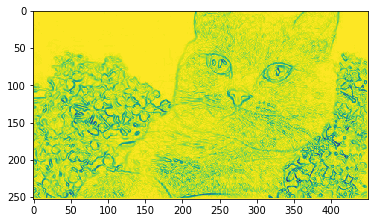

data/dataset_manual/cats/A/cats_183.jpg


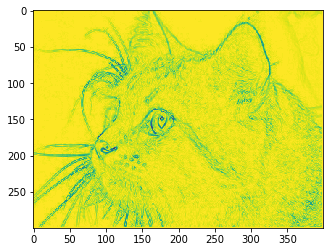

data/dataset_manual/cats/A/cats_181.jpg


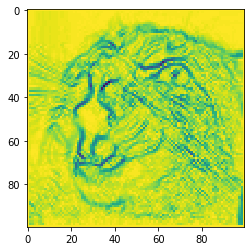

data/dataset_manual/cats/A/cats_59.jpg


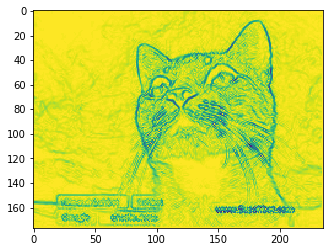

data/dataset_manual/cats/A/cats_141.jpg


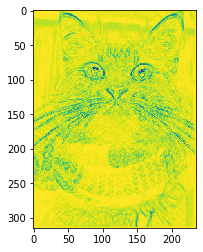

data/dataset_manual/cats/A/cats_223.jpg


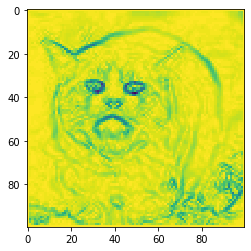

data/dataset_manual/cats/A/cats_177.jpg


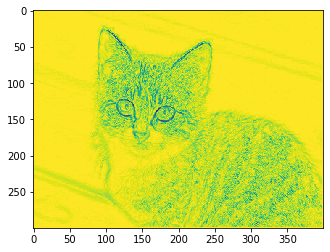

data/dataset_manual/cats/A/cats_204.jpg


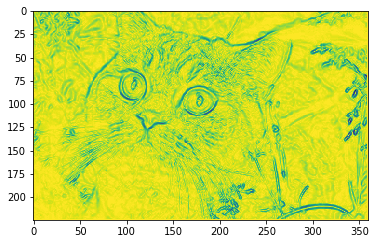

data/dataset_manual/cats/A/cats_35.jpg


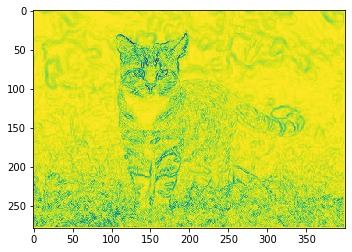

data/dataset_manual/cats/A/cats_167.jpg


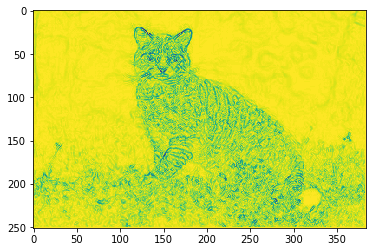

data/dataset_manual/cats/A/cats_169.jpg


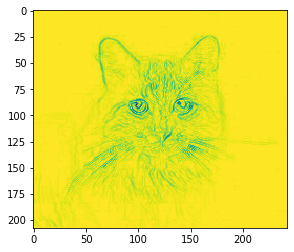

data/dataset_manual/cats/A/cats_139.jpg


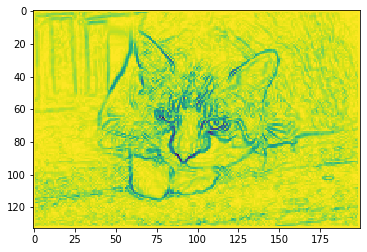

data/dataset_manual/cats/A/cats_163.jpg


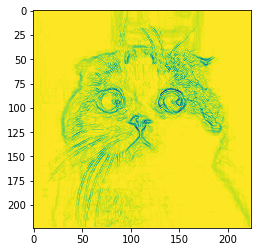

data/dataset_manual/cats/A/cats_3.jpg


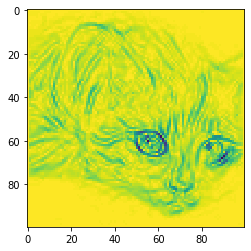

data/dataset_manual/cats/A/cats_106.jpg


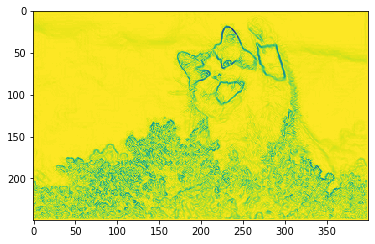

data/dataset_manual/cats/A/cats_89.jpg


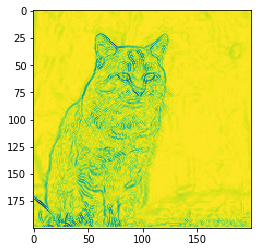

data/dataset_manual/cats/A/cats_142.jpg


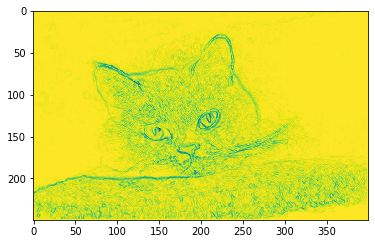

data/dataset_manual/cats/A/cats_78.jpg


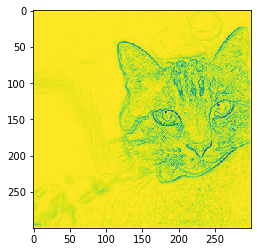

data/dataset_manual/cats/A/cats_145.jpg


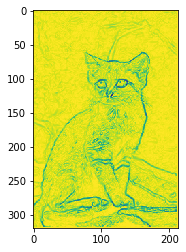

data/dataset_manual/cats/A/cats_184.jpg


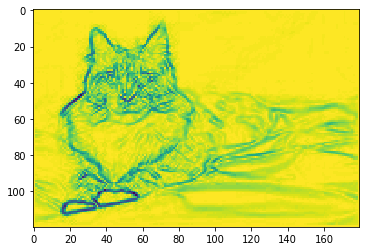

data/dataset_manual/cats/A/cats_90.jpg


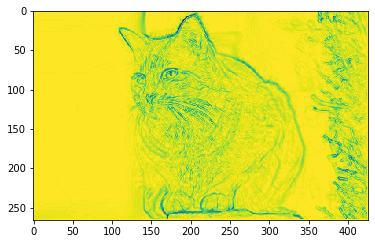

data/dataset_manual/cats/A/cats_128.jpg


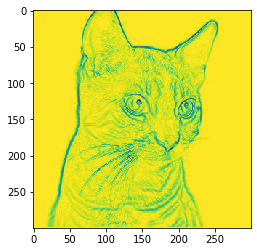

data/dataset_manual/cats/A/cats_32.jpg


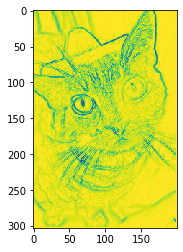

data/dataset_manual/cats/A/cats_62.jpg


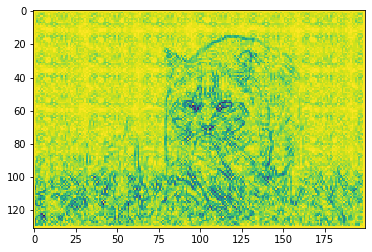

data/dataset_manual/cats/A/cats_13.jpg


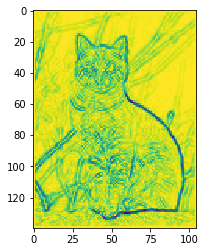

data/dataset_manual/cats/A/cats_127.jpg


KeyboardInterrupt: 

In [78]:
import os
    
sources = (dir_a).glob('*.jpg')
print(sources)
for source in tqdm_notebook(sources):
    print(source)
    path_to = Path(str(source).replace('A', 'B'))
    get_edges_2(source, path_to, show=True)

In [ ]:
# the same above but in cycle with all animals
    
for animal in ['cats', 'pigeons', 'owls', 'dogs']:
    data_root = path_to_dataset / animal
    dir_a = data_root / Path('A')
    dir_b = data_root / Path('B')
    sources = (dir_a).glob('*.jpg')
    for source in tqdm_notebook(sources):
        path_to = Path(str(source).replace('A', 'B'))
        get_edges_2(source, path_to, show=False)

/home/julia/PycharmProjects/Study/SocketLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [64]:
#mbdel
# combine imgs with pathlib
import os
data_root = path_to_dataset/animal
dir_A = data_root / Path('A')
dir_B = data_root / Path('B')
dir_AB = data_root / Path('AB')

img_list = [i for i in dir_A.glob('*.jpg')]

if not Path.exists(dir_AB):
    Path.mkdir(dir_AB)

for name_A in tqdm_notebook(img_list):
    path_A = Path(name_A)
    name_B = str(name_A).replace('A', 'B')
    path_B = Path(name_B)
    
    name_AB = name_A

    name_AB = str(name_AB).replace('A', 'AB')

    path_AB = Path(name_AB)

    im_A = cv2.imread(str(path_A), cv2.IMREAD_COLOR)
    im_B = cv2.imread(str(path_B), cv2.IMREAD_COLOR)

    im_AB = np.concatenate([im_A, im_B], 1)
    cv2.imwrite(str(path_AB), im_AB)

/home/julia/PycharmProjects/Study/SocketLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [65]:
# split data
split = ['val', 'test', 'train']

for spl in tqdm_notebook(split):
    path_to_split = dir_AB / Path(spl)
    if not Path.exists(path_to_split):
        Path.mkdir(path_to_split)
    
    num_imgs = len(list(
        dir_a.glob('*.jpg')
    ))
    limit = 20 if spl != 'train' else num_imgs - 40

    for _ in range(limit):
        imgs = list(dir_AB.glob('*.jpg'))
        try:
            ind = np.random.randint(0, len(imgs))
            path_from = imgs[ind]
            file_name = path_from.parts[-1]
            path_to = path_to_split / file_name
            shutil.move(path_from, path_to)
        except ValueError:
            print('files are ended')

/home/julia/PycharmProjects/Study/SocketLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [69]:
# merge all data together

dirs = [i for i in path_to_dataset.iterdir()]

if not Path.exists(path_to_dataset.parent / 'AB'):
    Path.mkdir(path_to_dataset.parent / 'AB')
            
for dir_ in dirs:
    for spl_dir in (dir_/'AB').iterdir():
        split = spl_dir.parts[-1]

        if not Path.exists(path_to_dataset / 'AB' / split):
            Path.mkdir(path_to_dataset / 'AB' / split)
            
        for img in spl_dir.glob('*.jpg'):
            print(img)
            img_name = img.parts[-1]
            
            path_to = path_to_dataset.parent / 'AB' / split / img_name
            shutil.copy(img, path_to)
            

data/dataset/owls/AB/val/owls_223.jpg
data/dataset/owls/AB/val/owls_225.jpg
data/dataset/owls/AB/val/owls_141.jpg
data/dataset/owls/AB/val/owls_91.jpg
data/dataset/owls/AB/val/owls_229.jpg
data/dataset/owls/AB/val/owls_18.jpg
data/dataset/owls/AB/val/owls_184.jpg
data/dataset/owls/AB/val/owls_126.jpg
data/dataset/owls/AB/val/owls_221.jpg
data/dataset/owls/AB/val/owls_108.jpg
data/dataset/owls/AB/val/owls_131.jpg
data/dataset/owls/AB/val/owls_220.jpg
data/dataset/owls/AB/val/owls_204.jpg
data/dataset/owls/AB/val/owls_32.jpg
data/dataset/owls/AB/val/owls_199.jpg
data/dataset/owls/AB/val/owls_120.jpg
data/dataset/owls/AB/val/owls_33.jpg
data/dataset/owls/AB/val/owls_46.jpg
data/dataset/owls/AB/val/owls_251.jpg
data/dataset/owls/AB/val/owls_242.jpg
data/dataset/owls/AB/test/owls_109.jpg
data/dataset/owls/AB/test/owls_99.jpg
data/dataset/owls/AB/test/owls_156.jpg
data/dataset/owls/AB/test/owls_36.jpg
data/dataset/owls/AB/test/owls_74.jpg
data/dataset/owls/AB/test/owls_43.jpg
data/dataset/ow

data/dataset/dogs/AB/train/dogs_241.jpg
data/dataset/dogs/AB/train/dogs_66.jpg
data/dataset/dogs/AB/train/dogs_185.jpg
data/dataset/dogs/AB/train/dogs_138.jpg
data/dataset/dogs/AB/train/dogs_76.jpg
data/dataset/dogs/AB/train/dogs_108.jpg
data/dataset/dogs/AB/train/dogs_81.jpg
data/dataset/dogs/AB/train/dogs_53.jpg
data/dataset/dogs/AB/train/dogs_220.jpg
data/dataset/dogs/AB/train/dogs_109.jpg
data/dataset/dogs/AB/train/dogs_146.jpg
data/dataset/dogs/AB/train/dogs_75.jpg
data/dataset/dogs/AB/train/dogs_45.jpg
data/dataset/dogs/AB/train/dogs_215.jpg
data/dataset/dogs/AB/train/dogs_51.jpg
data/dataset/dogs/AB/train/dogs_62.jpg
data/dataset/dogs/AB/train/dogs_80.jpg
data/dataset/dogs/AB/train/dogs_56.jpg
data/dataset/dogs/AB/train/dogs_44.jpg
data/dataset/dogs/AB/train/dogs_103.jpg
data/dataset/dogs/AB/train/dogs_244.jpg
data/dataset/dogs/AB/train/dogs_79.jpg
data/dataset/dogs/AB/train/dogs_141.jpg
data/dataset/dogs/AB/train/dogs_23.jpg
data/dataset/dogs/AB/train/dogs_156.jpg
data/dataset/

data/dataset/pigeons/AB/train/pigeons_256.jpg
data/dataset/pigeons/AB/train/pigeons_197.jpg
data/dataset/pigeons/AB/train/pigeons_75.jpg
data/dataset/pigeons/AB/train/pigeons_170.jpg
data/dataset/pigeons/AB/train/pigeons_38.jpg
data/dataset/pigeons/AB/train/pigeons_4.jpg
data/dataset/pigeons/AB/train/pigeons_107.jpg
data/dataset/pigeons/AB/train/pigeons_134.jpg
data/dataset/pigeons/AB/train/pigeons_191.jpg
data/dataset/pigeons/AB/train/pigeons_9.jpg
data/dataset/pigeons/AB/train/pigeons_105.jpg
data/dataset/pigeons/AB/train/pigeons_166.jpg
data/dataset/pigeons/AB/train/pigeons_147.jpg
data/dataset/pigeons/AB/train/pigeons_13.jpg
data/dataset/pigeons/AB/train/pigeons_102.jpg
data/dataset/pigeons/AB/train/pigeons_61.jpg
data/dataset/pigeons/AB/train/pigeons_34.jpg
data/dataset/pigeons/AB/train/pigeons_121.jpg
data/dataset/pigeons/AB/train/pigeons_59.jpg
data/dataset/pigeons/AB/train/pigeons_246.jpg
data/dataset/pigeons/AB/train/pigeons_257.jpg
data/dataset/pigeons/AB/train/pigeons_84.jpg

In [59]:
# rename files
from pathlib import Path
import shutil

animal = 'pigeons'
path = f'./data/{animal}/AB/'

for folder in ['val', 'test', 'train']:
    path_to_folder = Path(path+folder)
    files = path_to_folder.glob('*.jpg')
    for file in files:
#         f'/{animal}_'+str(file).split('/')[-1])
        img = Path(f'{animal}_'+str(file).split('/')[-1])
        file_to = path_to_folder/img
        shutil.move(file, file_to)
#         break